## King County House Regression - Project#2

* Student name: ***Aysu Erdemir***
* Student pace: ***Flex***
* Scheduled project review date/time: ***August, 2022***
* Instructor name: ***Claude Fried***

## Overview

- This project analyzes house sale data from King County WA to provide insights and recommendations about the kind of houses "We Buy Ugly Houses" should invest on for their business.  

## Business Problem

- We Buy Ugly Houses is a real estate investor (House Flipper) thay operates in King County WA. They purchase properties with the intention of remodeling to add value, then resell those properties for a profit. 

- They want to know what type of houses to invest on for higher profit. 


## Methods 

1. Clean the dataset.
2. Conduct feature engineering to come up with meaningful variables to be used in linear regression.
3. Build a series of linear regression models to come up with the best model to describe the relationship between the independent variables and the target/dependent variable (`house price`). 
4. Check the linear regression assumptions to make sure normality, homoscadecity are not violated and multicollinearity does not present.
5. Draw conclusions and make suggestions about the kind of houses to invest on. 


## Data

King County House Sales dataset from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) which  contains house sale prices for King County sold between May 2014 and May 2015. 

The variables/features included in the dataset are:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [1]:
# Import standard packages

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- There are null values for `waterfront`, `view` and `yr_renovated`.

In [6]:
df.duplicated().sum()

0

In [7]:
df[df.duplicated('id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [8]:
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


- The same house was probably sold multiple times in the same year. 
- Let's take only the most recent sell for those 177 duplicated house IDs. 

## DATA CLEANING:

#### Drop Duplicates:

In [9]:
df = df.drop_duplicates(subset ='id', keep = 'last').reset_index(drop=True)
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


In [10]:
df.shape

(21420, 21)

#### Handling NaN values:

In [11]:
nulls = ['waterfront', 'view', 'yr_renovated']
print(*(f"{item}: {df[item].isnull().sum()}" for item in nulls), sep='\n' )

waterfront: 2353
view: 63
yr_renovated: 3813


In [12]:
df.waterfront.value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [13]:
df.view.value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [14]:
df.yr_renovated.value_counts()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df.waterfront.isna().sum()/len(df)

0.10985060690943044

- 11% of `waterfront` is NaN. 
- Let's convert that to 0, because if a house had waterfront, it would likely be known and marked as YES.

In [16]:
df.view.isna().sum()/len(df.view)

0.0029411764705882353

- .003 % of `view` is NaN. 
- Let's convert that to NONE, because if a house had view, it would likely be known.

In [17]:
# We would expect houses with NaN on view also to be NaN or NO on waterfront, let's double check that:

len(df[((df["waterfront"] == 'NO') | (df["waterfront"].isnull())) & 
       (df["view"].isnull())])  
# 62 out of 63 fits the criteria

62

In [18]:
# Let's replace null with NONE 
df['view'] = df['view'].fillna('NONE')

In [19]:
# We would expect houses with NaN on waterview also to be NONE on view, let's double check that:
len(df[ (df["view"] == 'NONE')  & (df["waterfront"].isnull())])
# Majority of the data (2093/2353) fits the criteria. 

2093

In [20]:
# Let's replace null with NO 
df['waterfront'] = df['waterfront'].fillna('NO')

In [21]:
df['yr_renovated'].describe()
# Minimum is 0 most likely meaning that house has not been renovated. 
# We will replace all NaNs with 0 to mean the same thing.

count    17607.000000
mean        83.890101
std        400.534473
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [22]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [23]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Fixing variable types:

In [24]:
df_fixed = df.copy()

In [25]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [26]:
df_fixed.columns.to_series().groupby(df_fixed.dtypes).groups
# object: ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']}

{int64: ['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'], float64: ['price', 'bathrooms', 'floors', 'yr_renovated', 'lat', 'long'], object: ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']}

These variables were coded as **string** and they need to be fixed (converted to **numerical**) for linear regression:
- object: `date`, `waterfront`, `view`, `condition`, `grade`, `sqft_basement`

In [27]:
df_fixed.waterfront.value_counts()

NO     21274
YES      146
Name: waterfront, dtype: int64

In [28]:
dic = {"NO":0, "YES":1}
df_fixed.replace({"waterfront": dic}, inplace=True)
df_fixed["waterfront"].value_counts()

0    21274
1      146
Name: waterfront, dtype: int64

In [29]:
df_fixed["waterfront"].dtype

dtype('int64')

In [30]:
df_fixed['view'].value_counts()

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [31]:
dic = {"NONE":1, "FAIR":2 ,"AVERAGE":3 ,"GOOD":4 ,"EXCELLENT":5}
df_fixed.replace({"view": dic}, inplace=True)
df_fixed["view"].value_counts()

1    19316
3      956
4      505
2      329
5      314
Name: view, dtype: int64

In [32]:
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [33]:
dic = {"Poor":1, "Fair":2 ,"Average":3 ,"Good":4 ,"Very Good":5}
df_fixed.replace({"condition": dic}, inplace=True)
df_fixed["condition"].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [34]:
df_fixed['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [35]:
dic = {"3 Poor":3, "4 Low":4, "5 Fair":5, "6 Low Average":6, "7 Average":7, "8 Good":8, \
       "9 Better":9, "10 Very Good":10, "11 Excellent":11, "12 Luxury":12,  "13 Mansion":13}
df_fixed.replace({"grade": dic}, inplace=True)
df_fixed["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [36]:
df_fixed['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [37]:
# Replace ? with 0 and then convert to numerical data
df_fixed['sqft_basement'].replace('?', '0.0', inplace = True)

In [38]:
df_fixed['sqft_basement'] = pd.to_numeric(df_fixed['sqft_basement'])
df_fixed['sqft_basement'].dtype

dtype('float64')

In [39]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

- We are **not** changing `date` datatype because we will derive another variable from it, and then we will drop it. 

## Feature Engineering:

In [40]:
df_new = df_fixed.copy()

- Drop `id` column since it has no meaning

In [41]:
df_new.drop(columns=['id'], inplace = True, axis=1)

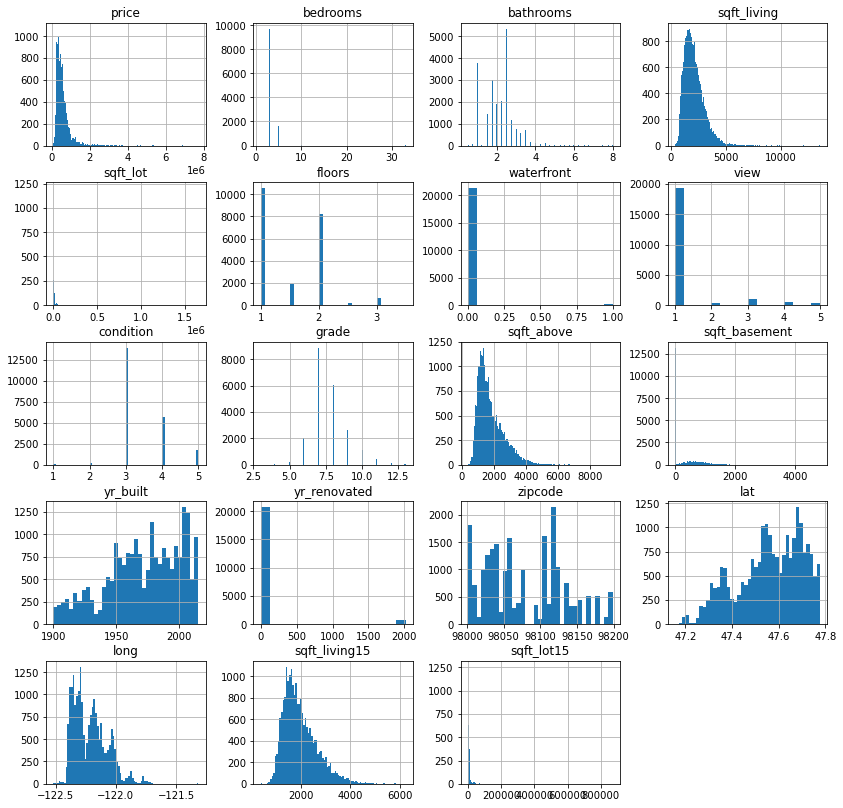

In [42]:
df_new.hist(bins='auto', edgecolor='none', figsize=(14,14));

#### The target / dependent variable:
- The sale prices have a negative skew, meaning the majority of the data is in the lower values, and there are fewer very high values. 
- We might benefit from (log) transforming this variable. 

In [43]:
# Code copied from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions and modified a bit. 
# Use the function below to get rid of 1e8s etc on graphs and to format numbers in thousands, millions, etc in visualizations..:

from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.0f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)

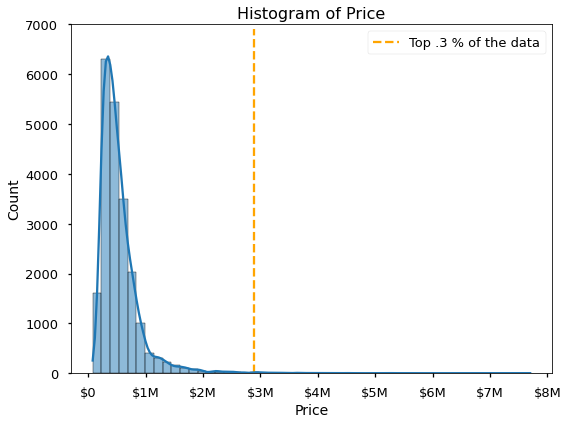

In [44]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(8, 6))

    sns.histplot(x = df_new['price'], bins=50, ax=ax, kde =True)
    ax.xaxis.set_major_formatter(formatter)
    plt.ylim(0, 7000)
    ax.set_title('Histogram of Price', fontsize=16)
    ax.set_xlabel("Price", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.vlines(df['price'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--', label = "Top .3 % of the data")
    ax.legend(loc = 'upper right')
    fig.tight_layout();
    
    fig.savefig('./images/Histogram_DependentMeasure.png', dpi=300)

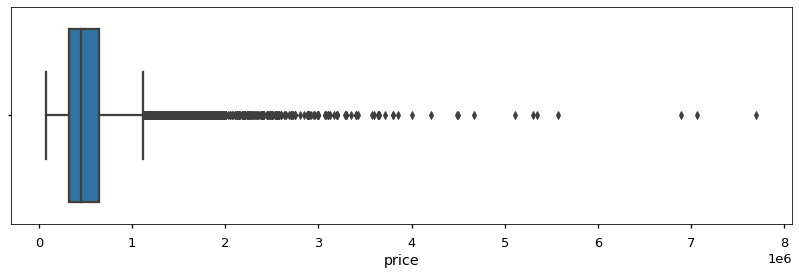

In [45]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = df_new['price'], ax=ax);

#### Remove the extreme outliers from the data:
    
- Since the distribution is highly skewed I will remove the top .3% of the data. 
- We will only be dealing with houses up to ~3M in price. 

In [46]:
oldshape = df_new.shape
print(f"oldshape: {oldshape}")

df_new = df_new[(df_new['price'] < df_new['price'].quantile(.997))]
print(f"newshape: {df_new.shape}")
print(oldshape[0] - df_new.shape[0])
print(((oldshape[0] - df_new.shape[0]) *100) /df_new.shape[0])

# we removed only 65 data points and .3 % of data.

oldshape: (21420, 20)
newshape: (21355, 20)
65
0.30437836572231325


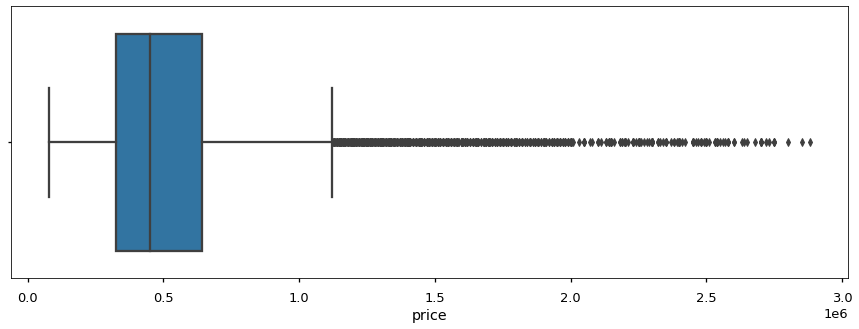

In [47]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(15, 5))
    sns.boxplot(x = df_new['price'], ax=ax)

#### Log Transform the target variable:

- Price distribution is still highly skewed so let's log transform the variable as well.  

In [48]:
df_new['log_price'] = np.log(df_new['price'])

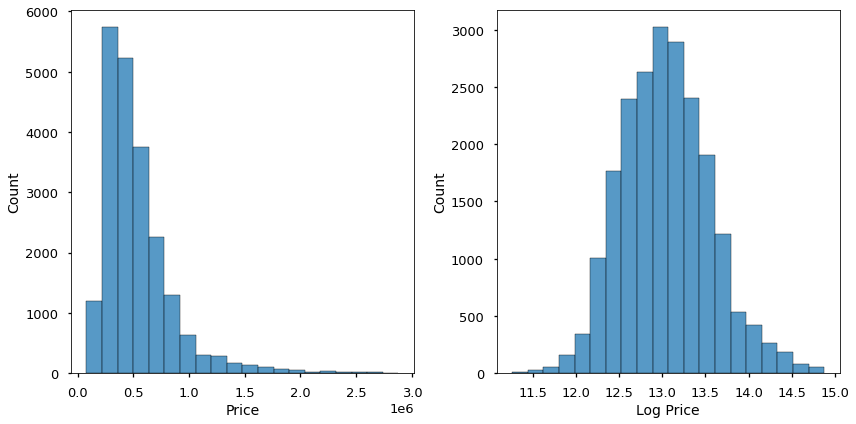

In [49]:
with plt.style.context('seaborn-talk'):

    fig, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(12, 6))
    fig.set_tight_layout(True)

    sns.histplot(x = df_new['price'], ax= ax1, bins=20);
    sns.histplot(x = df_new['log_price'], ax= ax2, bins=20);

    ax1.set_xlabel("Price", fontsize=14)
    ax2.set_xlabel("Log Price", fontsize=14)
    ax1.set_ylabel("Count", fontsize=14)
    ax2.set_ylabel("Count", fontsize=14)

    fig.savefig('./images/price_before_after_log.png', dpi=300);
    

- The price distribution looks NORMAL after log transformation. 

#### Creating a Binary View variable:
- The majority of the houses don't have a view and very few have ratings of 2-5. 
- So let's impute a new variable to indicate whether or not a house has a view. 


In [50]:
df_new['view'].value_counts()

1    19297
3      950
4      499
2      325
5      284
Name: view, dtype: int64

In [51]:
dic = {1:0, 2:1 ,3:1 ,4:1 ,5:1}
df_new['has_view'] = df_new['view'].map(dic)
df_new['has_view'].value_counts()

0    19297
1     2058
Name: has_view, dtype: int64

In [52]:
print(df_new.corr()['price']['view'])
print(df_new.corr()['price']['has_view'])

# Let's use `has_view` instead of `view`

0.37483613089845086
0.3500682990327732


#### Creating a Month variable:

- Date a house is sold cannot be significant in predicting house price so I will add a `month` column to indicate which month of the year the house was sold and drop the date. 

In [53]:
df_new['month'] = pd.to_datetime(df_new['date']).dt.month
df_new.drop(columns=['date'], inplace = True, axis=1)

In [54]:
mean_month = pd.DataFrame(df_new.groupby('month')['price'].median())  # median because price is skewed 
mean_month.head()

,price
month,
1,440000.0
2,426045.0
3,450000.0
4,475000.0
5,462000.0


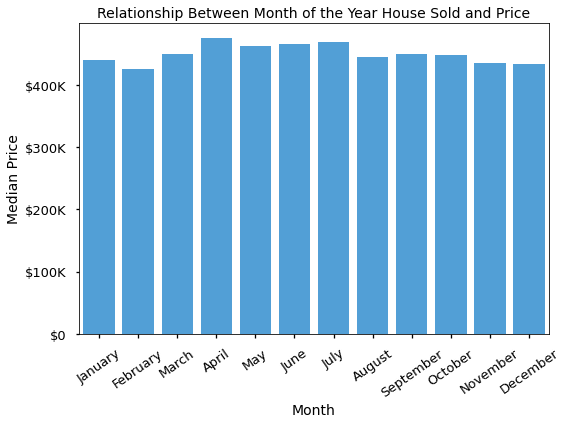

In [55]:
mean_month = pd.DataFrame(df_new.groupby('month')['price'].median())  # median because price is skewed 

with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 6))
    sns.barplot(x = mean_month.index, y= mean_month['price'], ax=ax, color = base_color)
    ax.set_xticklabels(labels=['January', 'February', 'March', 'April',
                               'May', 'June', 'July', 'August',
                              'September', 'October', 'November', 'December'], rotation = 35)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Month of the Year House Sold and Price',fontsize=14)
    ax.set_xlabel("Month",fontsize=14)
    ax.set_ylabel("Median Price",fontsize=14)
    fig.tight_layout();

    fig.savefig('./images/month_price-relationship.png', dpi=300);


In [56]:
dic = {1: 'january', 2:'february',3:'march',4:'april',5:'may',
       6:'june',7:'july',8:'august',9:'september',
       10:'october',11:'november',12:'december'}

df_new.replace({"month": dic}, inplace=True)

#### Dummy coding `month` variable:
- Months appear as distinct categories with no meaningful numerical relationship to one another.

In [57]:
month_dummies = pd.get_dummies(df_new['month']).drop(['january'], axis=1)
df_new = pd.concat([df_new, month_dummies], axis=1)
df_new = df_new.drop(['month'], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,august,december,february,july,june,march,may,november,october,september
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,7,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,1,3,6,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,7,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,0,0,1,0,0,0,0,0,0,0


#### Creating an age related variable:

- Let's create a new variable called `age` to represent the age of an house from the time it was built or renovated using `yr_built` and `yr_renovated`. 

In [58]:
# Because all houses were sold in 2014 and 2015 we will take 2015 as the current year. 

df_new['age'] = 2015 - df_new['yr_built'] # Set all age based on yr_built initially. 
mask = df_new['yr_renovated'] != 0 # create a mask for those rows with a value in yr_renovated.
df_new.loc[mask, "age"] = (2015 - df_new['yr_renovated']) # Set age based on yr_renovation where the mask condition is true

-0.09219731443044772


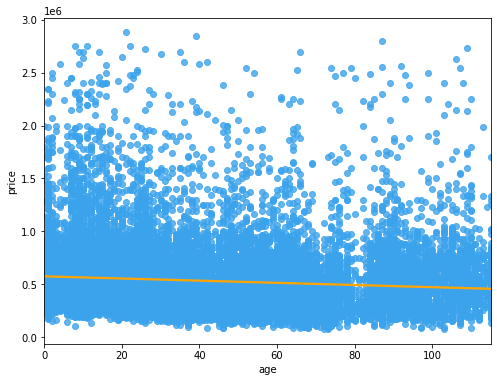

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="age", y="price", ax=ax, data=df_new, color = base_color, line_kws={"color": "orange"})
print(df_new.corr()['price']['age'])

# not much of a correlation but let's still keep this variable. 

- Let's create a new binary variable `age<30` where we group older versus younger houses. 
- We pick age 30 as the criterion for a house that most likely needs repair. 

In [60]:
df_new['age<30'] = df_new['age'] < 30
df_new['age<30'].value_counts()

False    12809
True      8546
Name: age<30, dtype: int64

In [61]:
dic = {False:"0", True:"1"}
df_new.replace({"age<30": dic}, inplace=True)
df_new["age<30"] = df_new["age<30"].astype(int)
df_new["age<30"].value_counts()

0    12809
1     8546
Name: age<30, dtype: int64

In [62]:
print(df_new.corr()['price']['age'])
print(df_new.corr()['price']['age<30']) 

-0.09219731443044772
0.16020160020637306


- Improvement in correlation with price. Let's pick `age<30` over `age`. 

In [63]:
df_new = df_new.drop(['yr_built', 'yr_renovated', 'age', 'view'], axis=1)

#### Creating a location based variable:

- There are 70 Zipcodes! Too many levels if we go for One Hot Encoding.
- We cannot leave it as label encoded either, zip numbers do not have a meaninful numerical relationship to one another. 
- I will engineer a new "location" variable with more meaningful categorical distinctions using Longitude-Latitude - I will then dummy code this variable. 


In [64]:
zipmeans = df_new.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zipmeans = pd.DataFrame(zipmeans).reset_index()
zipmeans.head()

,zipcode,price
0,98039,1.761750e+06
1,98004,1.245386e+06
2,98040,1.129398e+06
3,98112,1.051826e+06
4,98006,8.418961e+05


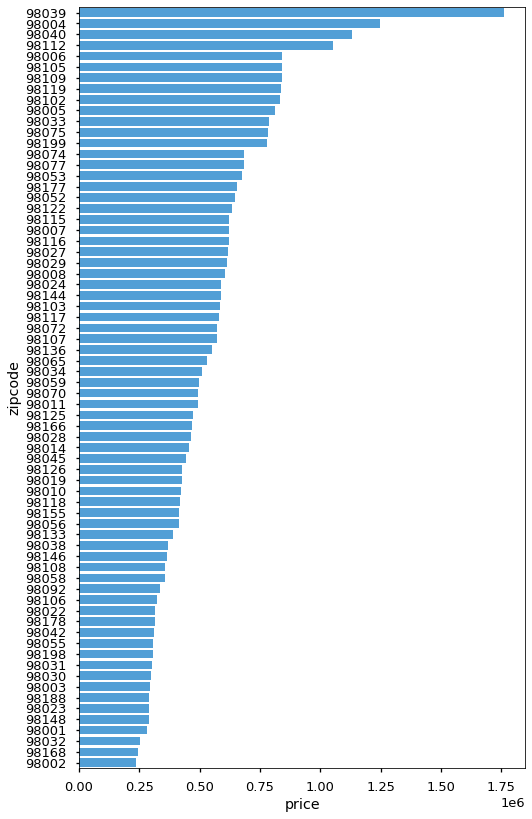

In [65]:
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 14))
    sns.barplot(x = zipmeans['price'], y= zipmeans['zipcode'],  
                order = zipmeans.sort_values('price',ascending = False).zipcode, ax=ax, color = base_color, orient = "h")


The most expensive 4 zipcodes: 
- Medina, Bellevue, Mercer Island and Seattle

#### Upload city data to use on the map:

- Upload US Zip Codes Database [here](https://simplemaps.com/data/us-zips) which contains `city` info in relation to `zipcodes`:


In [66]:
dfzip = pd.read_csv("./data/uszips.csv")
dfzip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [67]:
# subsetting the dataset to include those cities in KingCounty only:

dfzip = dfzip[(dfzip['county_names_all'].str.contains('King')) & (dfzip['state_id'] == 'WA') ]
print(dfzip.zip.nunique())
dfzip

89


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
32938,98001,47.30919,-122.26426,Auburn,WA,Washington,True,NaN,34455.0,713.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32939,98002,47.30820,-122.21567,Auburn,WA,Washington,True,NaN,33947.0,1829.6,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32940,98003,47.30596,-122.31465,Federal Way,WA,Washington,True,NaN,49445.0,1659.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32941,98004,47.61865,-122.20548,Bellevue,WA,Washington,True,NaN,37265.0,1979.1,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32942,98005,47.61494,-122.16814,Bellevue,WA,Washington,True,NaN,21414.0,1126.7,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33031,98199,47.65139,-122.40223,Seattle,WA,Washington,True,NaN,23444.0,2137.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33041,98224,47.73570,-121.56859,Baring,WA,Washington,True,NaN,243.0,1.5,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33092,98288,47.65204,-121.35740,Skykomish,WA,Washington,True,NaN,225.0,0.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33132,98354,47.25113,-122.31557,Milton,WA,Washington,True,NaN,7551.0,1029.0,53053,Pierce,"{""53053"": 80.02, ""53033"": 19.98}",Pierce|King,53053|53033,False,False,America/Los_Angeles


In [68]:
# For cities with multiple zipcodes find an average location latitude and longitude
dfzip_table = dfzip.groupby('city')[['lat', 'lng']].mean()
dfzip_table = dfzip_table.reset_index()
dfzip_table

,city,lat,lng
0,Auburn,47.301967,-122.203720
1,Baring,47.735700,-121.568590
2,Bellevue,47.602148,-122.155832
3,Black Diamond,47.311730,-122.003260
4,Bothell,47.757360,-122.198710
5,Carnation,47.696640,-121.840240
6,Duvall,47.740830,-121.934940
7,Enumclaw,47.171400,-121.679580
8,Fall City,47.573010,-121.902190
9,Federal Way,47.307385,-122.338315


- We have a total of 32 cities in KingCounty WA which we can superimpose on the map below:

In [69]:
# For the purpose of graphing removing far east cities of Baring, Skykomish, Snoqualmie Pass:
dfzip_table.drop(index=[1,27,29], axis=0, inplace=True)

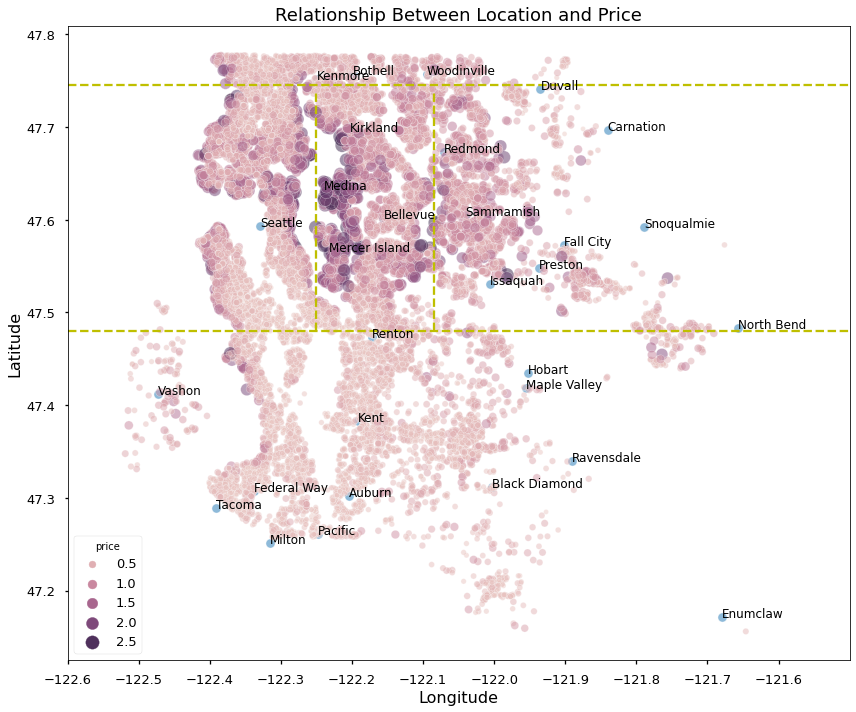

In [70]:
# Scatterplot of longitude and latitude with a hue of price, city names are superimposed to the map:
# Superimposed data is from: https://www.communitiescount.org/king-county-geographies
# The shape is the shape of King County, WA

with plt.style.context('seaborn-talk'):
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(data=dfzip_table, x='lng', y='lat',  alpha = .5, ax=ax)
    [plt.text(x=row['lng'], y=row['lat'], s=row['city'], size='large', color='black') for k,row in dfzip_table.iterrows()]

    sns.scatterplot(data=df_new, x='long', y='lat', hue='price', size="price",sizes=(20, 200),  alpha = .5, ax=ax) 
    ax.axhline(y= 47.48, xmin=0, xmax=1, color='y', linestyle='--')
    ax.axvline(x= -122.25, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    ax.axvline(x= -122.085, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    ax.axhline(y= 47.745, xmin=0, xmax=1, color='y', linestyle='--')
    plt.xticks(np.arange(-122.6, -121.5, 0.1))
    plt.xlim(-122.6, -121.5)
    ax.set_title('Relationship Between Location and Price',fontsize=18)
    ax.set_xlabel("Longitude",fontsize=16)
    ax.set_ylabel("Latitude",fontsize=16)
    fig.tight_layout();
    
    fig.savefig('./images/LocationMap.png', dpi=300);


#### Extract 5 regions based on coordinates: 

- North - Kenmore, Bothell, Woodinville
- East - Medina, Bellevue, Mercer Island and Kirkland
- Far East - Redmond, Sammamish etc. 
- West - Seattle.
- South - Tacoma, Renton, Kent etc.

In [71]:
df_new['coordinates'] = list(zip(df_new.lat, df_new.long))

def region(coordinate):
    if (coordinate[0] > 47.745):
        return 'north'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] < -122.25):
        return 'west'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] > -122.25) and  (coordinate[1] < -122.085):
        return 'east'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] > -122.085): 
        return 'fareast'
    else:
        return 'south'

region([47.5112, -122.257])

'west'

In [72]:
df_new['region'] = df_new['coordinates'].apply(region)
df_new['region'].head()

0       west
1       west
2       east
3       west
4    fareast
Name: region, dtype: object

In [73]:
df_new.groupby('region')['price'].median()

region
east       582250.0
fareast    585000.0
north      437000.0
south      299900.0
west       490000.0
Name: price, dtype: float64

In [74]:
df_new['region'].value_counts()

west       7344
south      5661
east       4448
fareast    2665
north      1237
Name: region, dtype: int64

In [75]:
mean_region = pd.DataFrame(df_new.groupby('region')['price'].median())
mean_region['price']

region
east       582250.0
fareast    585000.0
north      437000.0
south      299900.0
west       490000.0
Name: price, dtype: float64

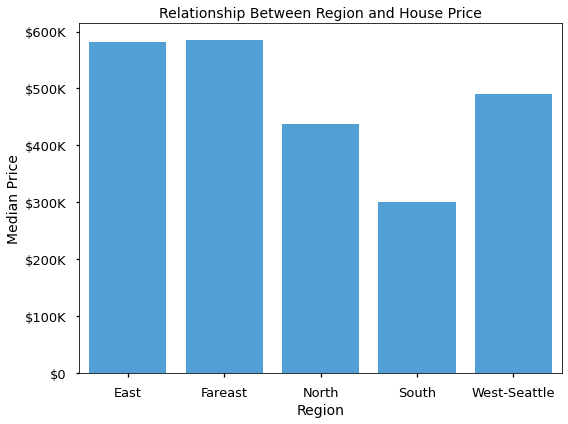

In [76]:
mean_region = pd.DataFrame(df_new.groupby('region')['price'].median())  # median because price is skewed 

with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 6))
    sns.barplot(x = mean_region.index, y= mean_region['price'], ax=ax, color = base_color)
    ax.set_xticklabels(labels=['East', 'Fareast', 'North', 'South', 'West-Seattle'])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Region and House Price',fontsize=14)
    ax.set_xlabel("Region",fontsize=14)
    ax.set_ylabel("Median Price",fontsize=14)
    fig.tight_layout();

    fig.savefig('./images/region_price-relationship.png', dpi=300);

- East regions appear as the most expensive area, followed by Seattle and then north. South is the cheapest. 

In [77]:
# South region is the reference point
region_dummies = pd.get_dummies(df_new['region']).drop(['south'],axis=1)
df_new = pd.concat([df_new, region_dummies], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,november,october,september,age<30,coordinates,region,east,fareast,north,west
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,...,0,1,0,0,"(47.5112, -122.257)",west,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,...,0,0,0,1,"(47.721, -122.319)",west,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,...,0,0,0,0,"(47.7379, -122.233)",east,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,...,0,0,0,0,"(47.5208, -122.393)",west,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,...,0,0,0,1,"(47.6168, -122.045)",fareast,0,1,0,0


In [78]:
df_new = df_new.drop(['region','coordinates', 'zipcode'], axis=1)
# Zipcodes cannot be left as label encoded since the levels do not have a numerical relationship. 

## Feature Engineering Continued:

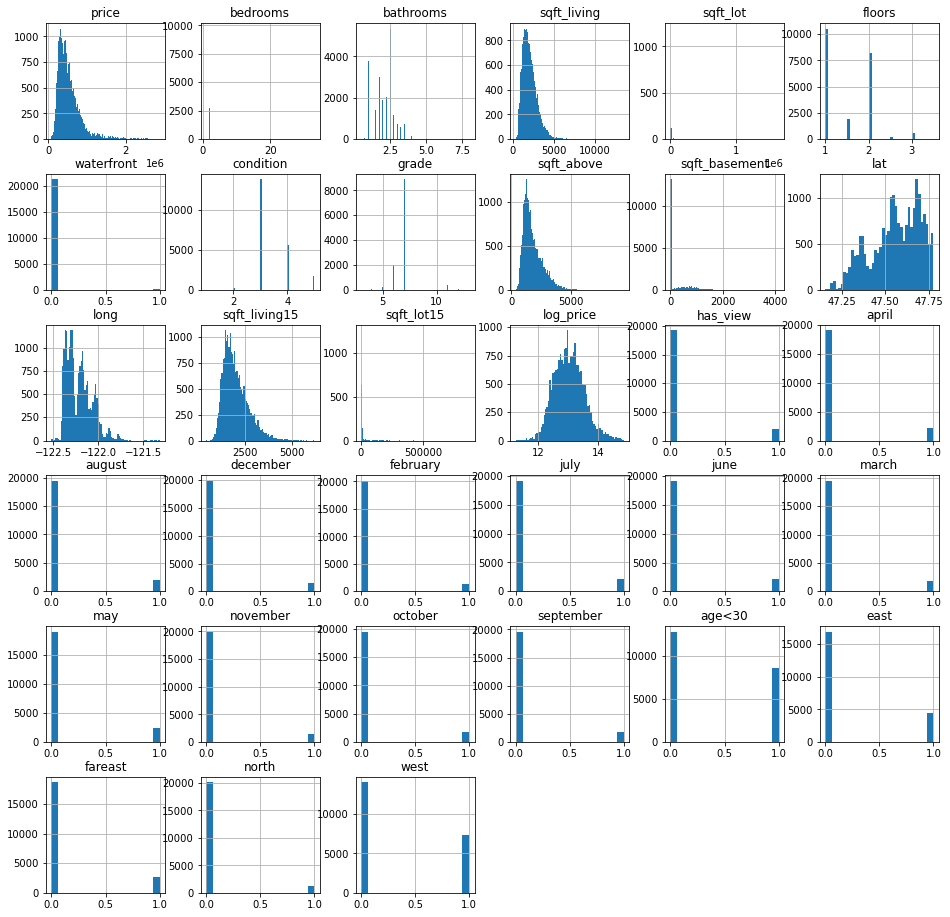

In [79]:
df_new.hist(bins='auto', edgecolor='none', figsize=(16,16));

#### Remove outliers from `bedrooms` and `bathrooms`:

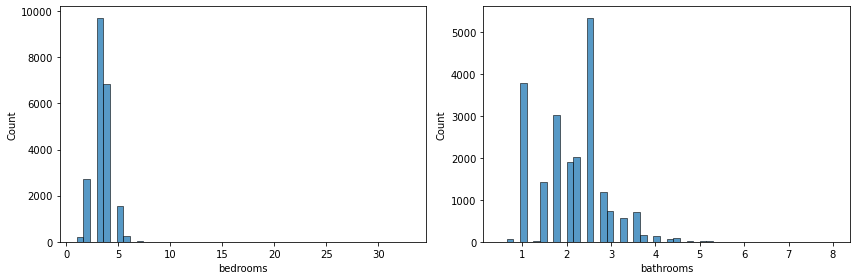

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=50);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=50);  

# There are outliers in both bathrooms and bedrooms.

In [81]:
df_new['bedrooms'].describe()

count    21355.000000
mean         3.370265
std          0.922473
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [82]:
df_new['bathrooms'].describe()

count    21355.000000
mean         2.111672
std          0.757100
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [83]:
print(df_new['bedrooms'].quantile(.999))
print(df_new['bathrooms'].quantile(.999))

8.0
5.25


In [84]:
# Let's remove some very high values visible in the histogram ~ top 1 percent. 
df_new =  df_new[df_new['bedrooms'] <= 8]
df_new =  df_new[df_new['bathrooms'] <= 6]

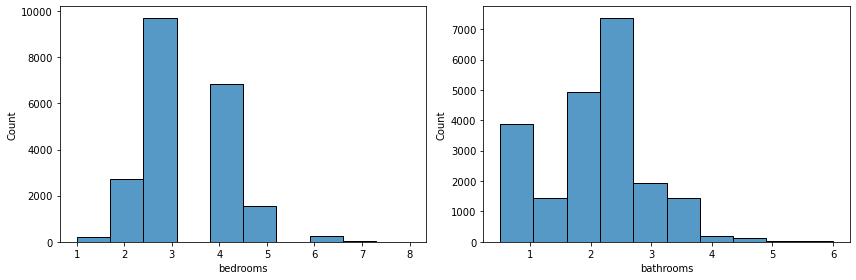

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=10);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=10);  


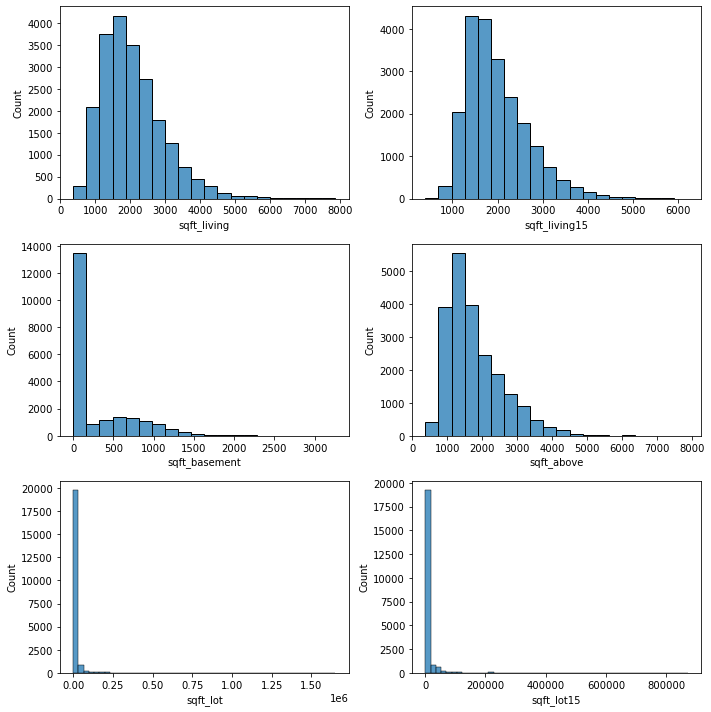

In [86]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['sqft_basement'], ax =ax3, bins=20); 
sns.histplot(x = df_new['sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['sqft_lot'], ax =ax5, bins=50); 
sns.histplot(x = df_new['sqft_lot15'], ax= ax6, bins=50);

In [87]:
df_new.shape

(21340, 33)

In [88]:
print(df_new['sqft_lot'].quantile(.99)) # np.percentile(df_new['sqft_lot'],98)
print(df_new['sqft_lot15'].quantile(.99))

213008.0
157687.0


#### Remove outliers from `sqft_lot`, and `sqft_lot15`:

In [89]:
# Remove some high values from sqft_lot and sqft_lot15
df_new =  df_new[df_new['sqft_lot'] < 120000]  
df_new =  df_new[df_new['sqft_lot15'] < 120000]

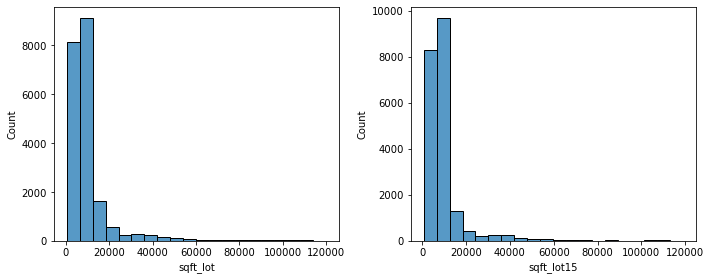

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_lot'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_lot15'], ax= ax2, bins=20);

#### Create a new `sqft_basement` variable:
- `has_basement` will define precence or absence of `sqft_basement` since more than half of the houses don't have a basement.

In [91]:
len(df_new[df_new['sqft_basement'] == 0])

12834

In [92]:
df_new['has_basement'] = df_new['sqft_basement'] > 0
df_new['has_basement'].value_counts()

False    12834
True      8070
Name: has_basement, dtype: int64

In [93]:
dic = {False:"0", True:"1"}
df_new.replace({"has_basement": dic}, inplace=True)
df_new["has_basement"] = df_new["has_basement"].astype(int)
df_new["has_basement"].value_counts()

0    12834
1     8070
Name: has_basement, dtype: int64

In [94]:
print(df_new.corr()['price']['sqft_basement'])
print(df_new.corr()['price']['has_basement']) 
# correlation coef is smaller for has_basement but since this variable is more meaningful let's use it and drop 'sqft_basement'

0.2983845422940022
0.18230767995993896


In [95]:
len(df_new[df_new['sqft_lot'] == 0])

0

In [96]:
df_new.drop('sqft_basement', axis=1, inplace=True ) 

#### Log transform skewed variables in case we need to use them in regression:

In [97]:
for var in ['sqft_living','sqft_living15','sqft_above','sqft_lot','sqft_lot15']: 
    df_new[f"log_"+var] = np.log(df_new[var])  # df_new[f"log{var}"] = np.log(df_new[var])

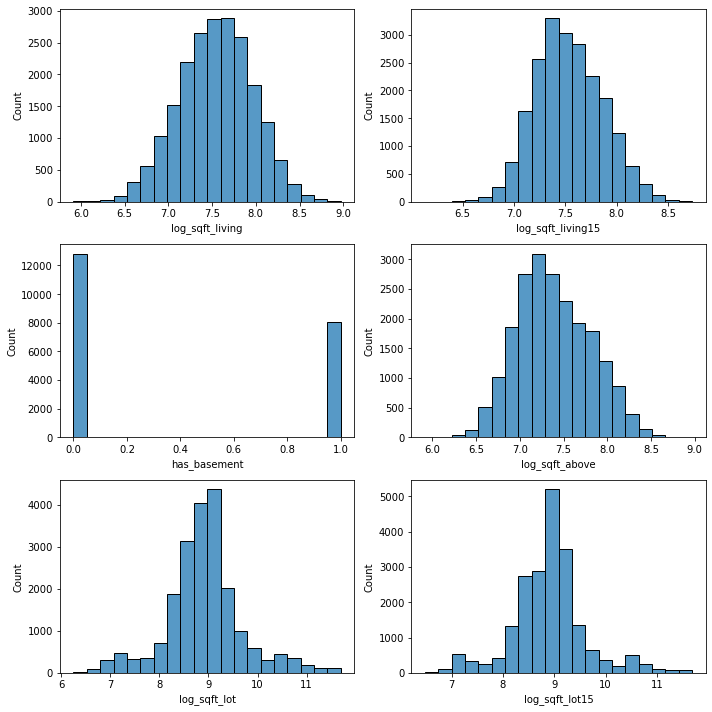

In [98]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['log_sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['log_sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['has_basement'], ax= ax3, bins=20);
sns.histplot(x = df_new['log_sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['log_sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['log_sqft_lot15'], ax= ax6, bins=20);

In [99]:
print(df.shape)
print(df_new.shape)

(21420, 21)
(20904, 38)


- In the end we lost ~ 2.5% of the data during data engineering process:

In [100]:
total_dataloss = ((df_fixed.shape[0] - df_new.shape[0]) * 100 ) /  df_fixed.shape[0]
total_dataloss

2.4089635854341735

## Feature Selection:

In [101]:
data = df_new.copy()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,east,fareast,north,west,has_basement,log_sqft_living,log_sqft_living15,log_sqft_above,log_sqft_lot,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,...,0,0,0,1,0,7.073270,7.200425,7.073270,8.639411,8.639411
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,...,0,0,0,1,1,7.851661,7.432484,7.682482,8.887653,8.941022
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,...,1,0,0,0,0,6.646391,7.908387,6.646391,9.210340,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,...,0,0,0,1,1,7.580700,7.215240,6.956545,8.517193,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,...,0,1,0,0,0,7.426549,7.495542,7.426549,8.997147,8.923058


In [102]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'has_view', 'april',
       'august', 'december', 'february', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_above', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

### HEATMAP


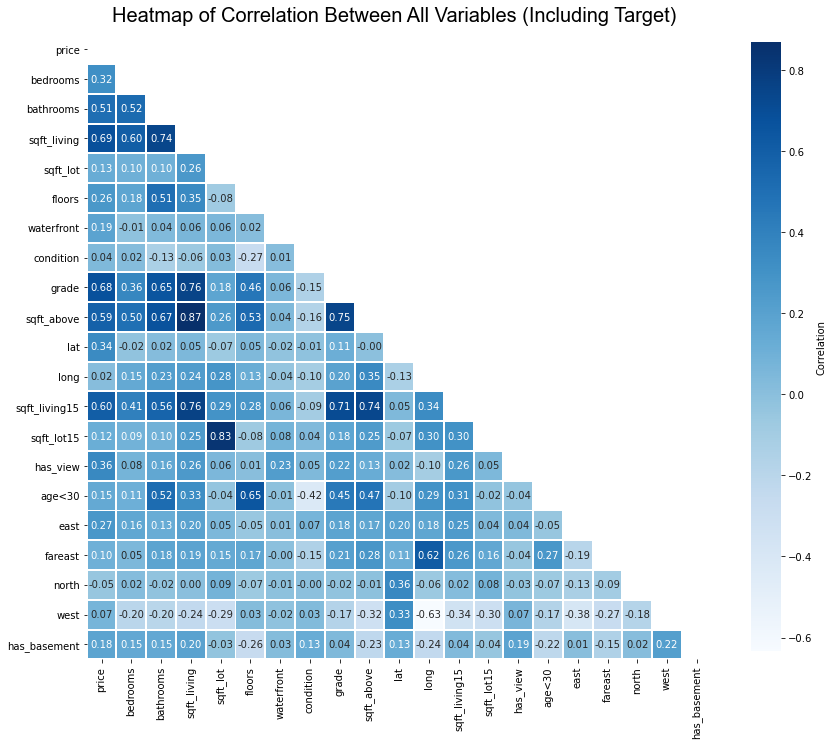

In [103]:
variables = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15',  'has_view',
        'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement']]

corr = variables.corr()

fig, ax=plt.subplots(figsize=(14,14))
matrix = np.triu(corr) # Getting the Upper Triangle of the correlation matrix
cbar_kws={"label": "Correlation", "shrink":0.8}
heatmap = sns.heatmap(data = corr, cmap='Blues', linewidths = 1, square= True,  ax=ax, annot=True, mask=matrix, fmt= ".2f", cbar_kws=cbar_kws) 
fig.suptitle('Heatmap of Correlation Between All Variables (Including Target)', fontsize=20, y=.84, x = .43, fontname='Arial');
heatmap;

fig.savefig('./images/Heatmap_Correlation.png', dpi=300);


#### Write a function to show the most correlated pairs:

In [104]:
def show_corr_pairs(data):
    dataCorr = data.corr().abs()
    dataCorr = dataCorr.mask(np.triu(np.ones(dataCorr.shape)).astype(np.bool)) # convert upper triangle of values to NaN to remove repeated values from the table
    dataCorr = dataCorr.stack().reset_index().sort_values(0, ascending=False) #0 is the column automatically generated by the stacking
    dataCorr = dataCorr[(dataCorr[0]>.7) & (dataCorr[0]<1)]
    dataCorr =  dataCorr.rename(columns = {'level_0': 'var1', 'level_1': 'var2', 0:'corrcoef'})
    return dataCorr


In [105]:
show_corr_pairs(variables)

,var1,var2,corrcoef
39,sqft_above,sqft_living,0.867865
82,sqft_lot15,sqft_lot,0.832800
69,sqft_living15,sqft_living,0.763589
31,grade,sqft_living,0.755051
44,sqft_above,grade,0.747496
5,sqft_living,bathrooms,0.743058
75,sqft_living15,sqft_above,0.735825
74,sqft_living15,grade,0.711495


- `sqft_living` correlates highly with `sqft_above` and `sqft_living`. 
- `sqft_living` correlates highly with `grade` and `bathrooms` too.
- `sqft_lot15` correlates highly with `sqft_lot`.

In [106]:
variables.corr()['price'].map(abs).sort_values(ascending=False) 

price            1.000000
sqft_living      0.685533
grade            0.675277
sqft_living15    0.600749
sqft_above       0.586275
bathrooms        0.508569
has_view         0.355573
lat              0.344114
bedrooms         0.321149
east             0.270383
floors           0.264440
waterfront       0.191616
has_basement     0.182308
age<30           0.152268
sqft_lot         0.133435
sqft_lot15       0.122568
fareast          0.100217
west             0.074890
north            0.045800
condition        0.043828
long             0.015586
Name: price, dtype: float64

- `sqft_living` seems to have the greatest correlation with `price`. 

In [107]:
df_corr = abs(variables.corr()) > 0.7
df_corr.sum()

price            1
bedrooms         1
bathrooms        2
sqft_living      5
sqft_lot         2
floors           1
waterfront       1
condition        1
grade            4
sqft_above       4
lat              1
long             1
sqft_living15    4
sqft_lot15       2
has_view         1
age<30           1
east             1
fareast          1
north            1
west             1
has_basement     1
dtype: int64

- `Square Foot Living` is the variable with the greatest collinearity to others too.

###  Take away from the Heat Map
- `sqft_living`, `sqft_above` ,`sqft_living15` correlate highly. Keep `sqft_living` as it correlates with price the highest. 
- `grade` and `bathrooms` also correlate highly with `sqft_living`. But let's keep these variables since they give a different type of information. 
- Do not use `lat` and `long` since they are redundant with location variables.
- `sqft_lot15`and `sqft_lot` correlate highly. Keep `sqft_lot` as it correlates with price a bit more.

## Regression Assumptions Check Functions:

### Linearity:
- There should be a linear relationship between the response/target variable and predictors.
- Check for this once using scatterplots and then visually inspecting the scatterplots for linearity.. 

In [108]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'has_view', 'april',
       'august', 'december', 'february', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_above', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

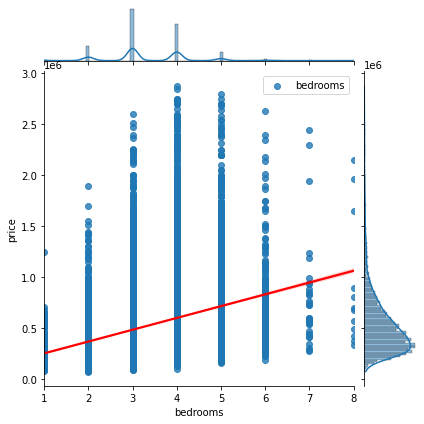

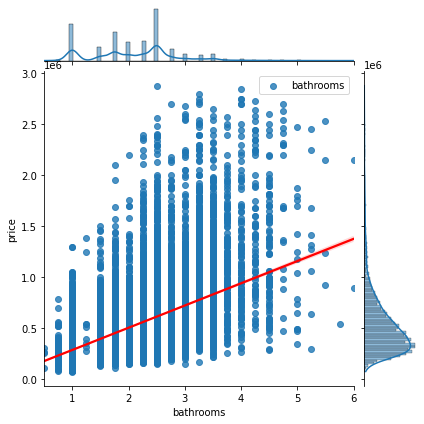

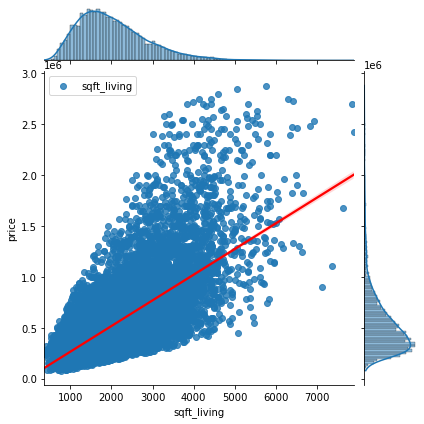

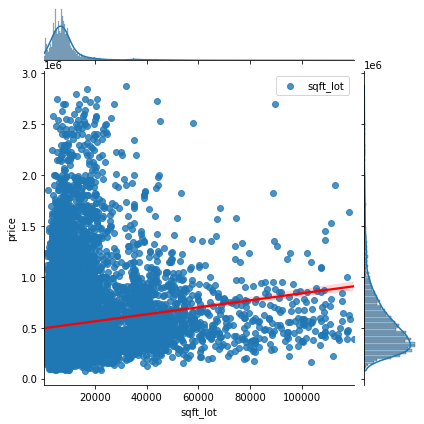

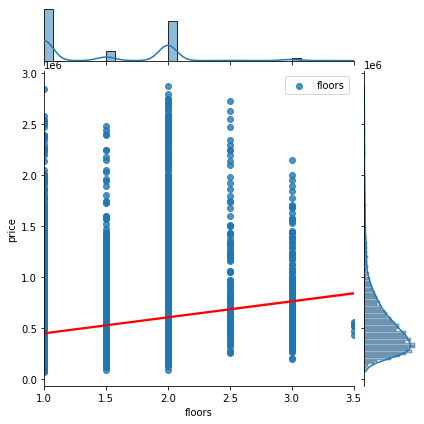

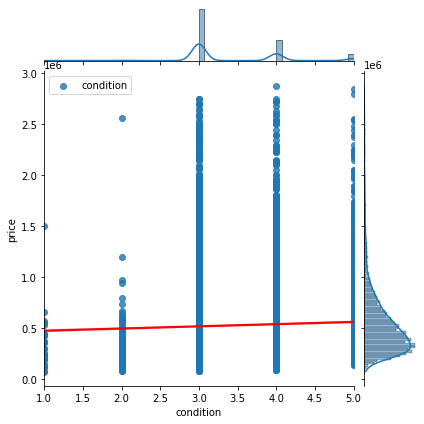

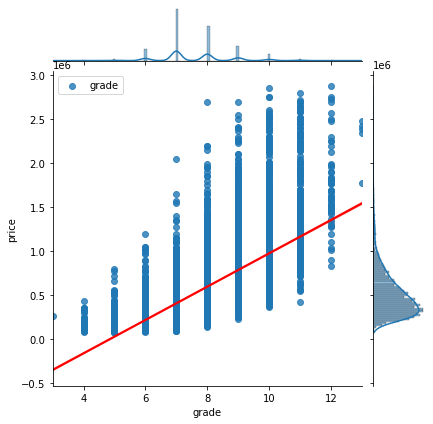

In [109]:
# Linearity against `price`:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade']

for column in continuous:
    sns.jointplot(x=column, y="price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

- Looks like a linear relationship except `sqft_lot`

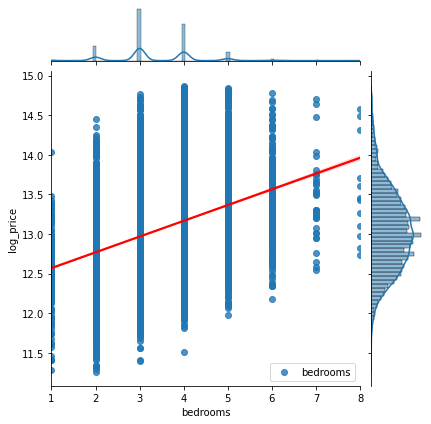

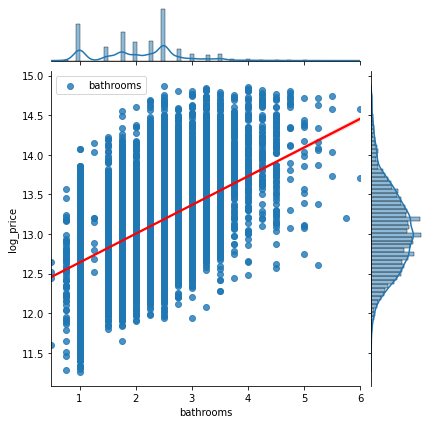

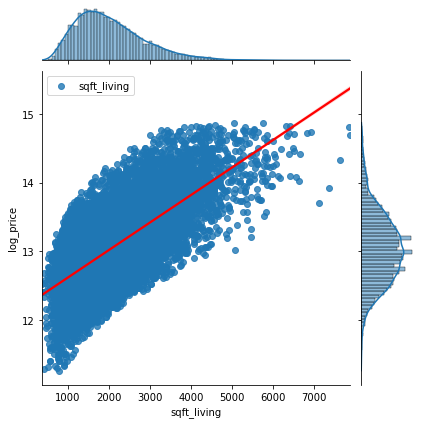

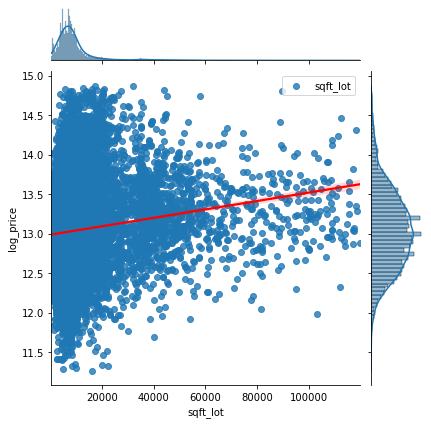

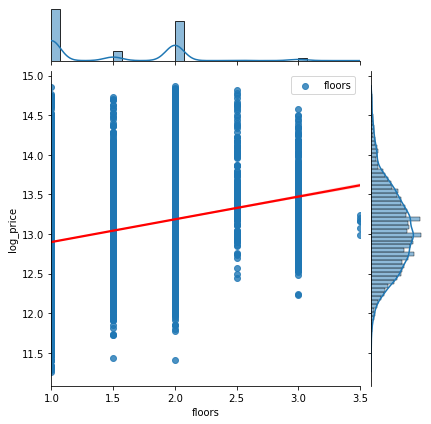

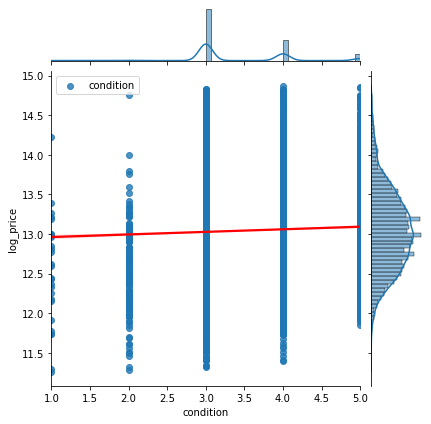

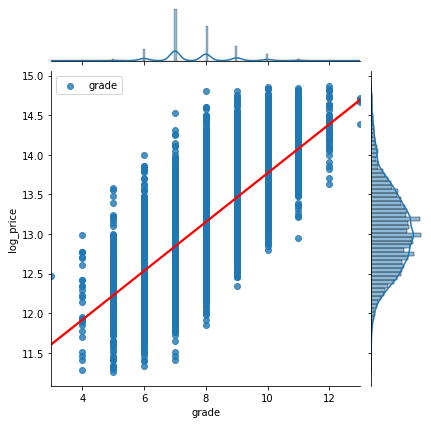

In [110]:
# Linearity against `log_price`:

continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade']

for column in continuous:
    sns.jointplot(x=column, y="log_price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

- Looks like a linear realtionship for all variables. 

### Check for Normality and Homoscadecity:
- The model residuals should follow a normal distribution.
- The residuals should be evenly spread through range (The variance of residual is uniform).

In [111]:
def normality_homoscadecity(model):
    fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3,  figsize=(16, 4))
    
    ax1.hist(model.resid_pearson,bins=20,edgecolor='k')
    ax1.set_xlabel("Normalized residuals",fontsize=14)
    ax1.set_ylabel("Count",fontsize=14)
    ax1.set_title("Histogram of normalized residuals (NORMALITY)", fontsize =11)

    from statsmodels.graphics.gofplots import qqplot
    qqplot(model.resid_pearson, line='45', fit='True', ax = ax2, alpha=0.8, markerfacecolor='#1f77b4')
    ax2.set_xlabel("Theoretical quantiles",fontsize=14)
    ax2.set_ylabel("Ordered Values",fontsize=14)
    ax2.set_title("Q-Q plot of normalized residuals (NORMALITY)", fontsize =11)
    
    ax3.scatter(x=model.fittedvalues, y=model.resid)
    xmin=min(model.fittedvalues)
    xmax = max(model.fittedvalues)
    plt.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)
    ax3.set_xlabel("Fitted values",fontsize=14)
    ax3.set_ylabel("Residuals",fontsize=14)
    ax3.set_title("Fitted vs. residuals plot (HOMOSCADECITY)", fontsize =11)
    plt.grid(True)
    
    return(ax)

### Check for absence of multicollinearity:

- Multicollinearity occurs when 2 or more of the independent variables are highly correlated with each other.
- VIF (variance inflation factor) is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression.
- If VIF is greater than 5, then the explanatory variable is highly collinear with another explanatory variable. 

In [112]:
#https://github.com/cwf231/linear_regression_guided_practice
from statsmodels.stats.outliers_influence import variance_inflation_factor

def create_vif_dictionary(X):
    vif_dct = {}
    for i in range(len(X.columns)): # Loop through each row and set the variable name to the VIF. 
        vif = variance_inflation_factor(X.values, i) # Calculate VIF
        v = X.columns[i] # Extract column name for dictionary key.
        vif_dct[v] = vif # Set value in dictionary.
    return vif_dct

def multicollinearity(X):
    multicollinearity = pd.DataFrame(create_vif_dictionary(X), index=[0]).T
    return multicollinearity.sort_values(by = 0, ascending =False).apply(lambda x: x.apply('{0:.4f}'.format))

## Regression Modeling:

### BASELINE MODEL #1

- The baseline model is using the most highly correlated variable with price: `sqft_living`

In [113]:
y = data['price']
X = data['sqft_living']

X.shape, y.shape

((20904,), (20904,))

In [114]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:24   Log-Likelihood:            -2.8804e+05
No. Observations:               20904   AIC:                         5.761e+05
Df Residuals:                   20902   BIC:                         5.761e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.031e+04   4143.504      2.489      0.013    2191.002    1.84e+04
sqft_living   252.8318      1.857    136.134      0.000     249.192     256.472
==============================================================================
Omnibus:                     8006.855   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52765.454
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                      10.004   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

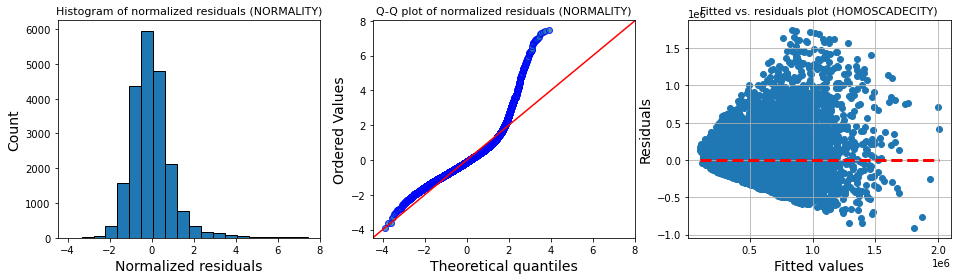

In [115]:
normality_homoscadecity(model);

#### Violation of normality and homoscadecity:

-  The Distribution of the rediduals are NOT normal. The blue dots are the observed data while the red regression line is the prediction on the second graph. The residuals are NOT normally distributed as the blue dots are not falling on the red line. We may fix this by transforming the target variable and/or independent variables.
- There seems like a violation of Homoskedasticity as well since the dots around the red line are not symmetric and follow a cone-like shape. We can try log transforming the target variable. 

### MODEL #2
- Using log transformed `log_price` as the target variable.

In [116]:
y = data['log_price']
X = data['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 1.802e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:24   Log-Likelihood:                -9171.7
No. Observations:               20904   AIC:                         1.835e+04
Df Residuals:                   20902   BIC:                         1.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2174      0.007   1833.395      0.000      12.204      12.230
sqft_living     0.0004   2.99e-06    134.225      0.000       0.000       0.000
==============================================================================
Omnibus:                       76.821   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.899
Skew:                           0.057   Prob(JB):                     3.62e-14
Kurtosis:                       2.759   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

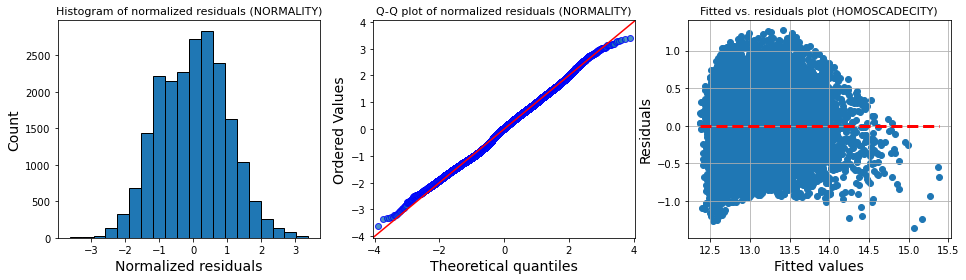

In [117]:
normality_homoscadecity(model);

- Normality and homoscadecity seem to be restored when we used log-transformed target variable!

#### Summary interpretation:

- p value for `sqft_living` is statistically significant, meaning we can reject the null hypothesis that `sqft_living` does not correlate with price. In other words we can also say: there is enough evidence in favor of the idea that change in `sqft_living` is associated with change in `price` at the population level. This variable is a worthwhile addition to our regression model. 
- A Coefficient of Determination **R-Squared** value of .46 means that 46% of the variability in price is explained by sqft_living. R-Squared explains how good our model is when compared to a baseline model where y = mx. We need to boost this number. 

### MODEL #3
- Using log transformed `log_sqft_living` as the predictor variable to see if it would improve R2.

In [118]:
y = data['log_price']
X = data['log_sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.625e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:25   Log-Likelihood:                -9658.4
No. Observations:               20904   AIC:                         1.932e+04
Df Residuals:                   20902   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9135      0.048    143.586      0.000       6.819       7.008
log_sqft_living     0.8124      0.006    127.459      0.000       0.800       0.825
==============================================================================
Omnibus:                      162.613   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.560
Skew:                           0.107   Prob(JB):                     3.29e-28
Kurtosis:                       2.685   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

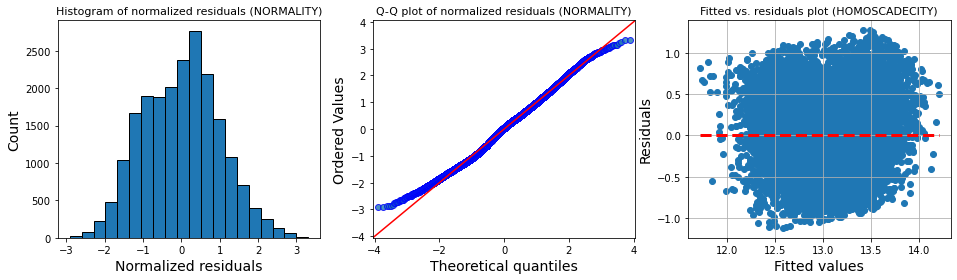

In [119]:
normality_homoscadecity(model);

- This was worse in terms of R2 and even normality. Let's go back to using un-transformed sqft_living. 

### MODEL #4
- Using `sqft_living` and `sqft_lot` as the 2 basic area variables.

In [120]:
y = data['log_price']
X = data[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     9102.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:25   Log-Likelihood:                -9121.3
No. Observations:               20904   AIC:                         1.825e+04
Df Residuals:                   20901   BIC:                         1.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2236      0.007   1830.876      0.000      12.210      12.237
sqft_living     0.0004   3.09e-06    132.479      0.000       0.000       0.000
sqft_lot    -2.175e-06   2.16e-07    -10.049      0.000    -2.6e-06   -1.75e-06
==============================================================================
Omnibus:                       65.587   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.110
Skew:                           0.047   Prob(JB):                     2.93e-12
Kurtosis:                       2.771   Cond. No.                     4.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

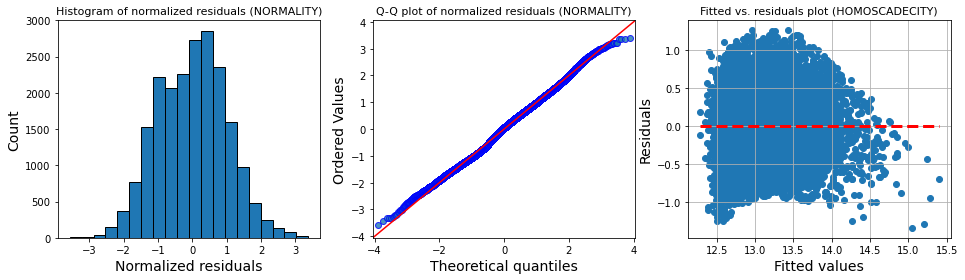

In [121]:
normality_homoscadecity(model);

In [122]:
multicollinearity(X)

,0
const,6.6484
sqft_living,1.0737
sqft_lot,1.0737


In [123]:
print(data.corr()['price']['sqft_living'])
print(data.corr()['price']['sqft_lot'])

0.6855331909828829
0.13343455593875633


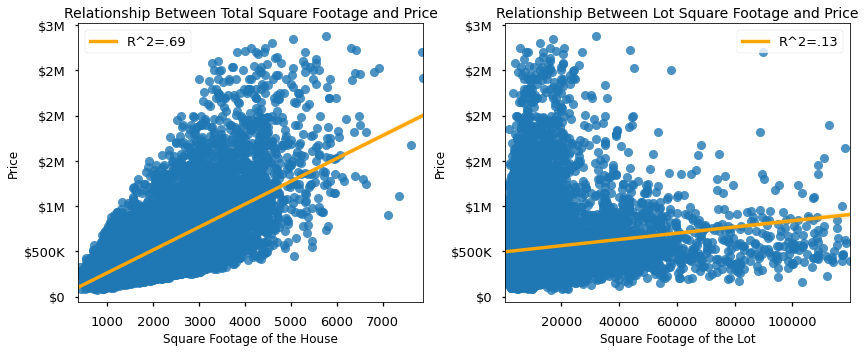

In [124]:
with plt.style.context('seaborn-talk'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
    fig.set_tight_layout(True)

    sns.regplot(x="sqft_living", y="price", ax=ax1, data=data, line_kws={"color": "orange","label":"R^2=.69"})
    ax1.legend()
    ax1.yaxis.set_major_formatter(formatter)
    ax1.set_title('Relationship Between Total Square Footage and Price',fontsize=14)
    ax1.set_xlabel("Square Footage of the House",fontsize=12)
    ax1.set_ylabel("Price",fontsize=12)

    sns.regplot(x="sqft_lot", y="price", ax=ax2, data=data, line_kws={"color": "orange","label":"R^2=.13"})
    ax2.legend()
    ax2.yaxis.set_major_formatter(formatter)
    ax2.set_title('Relationship Between Lot Square Footage and Price',fontsize=14)
    ax2.set_xlabel("Square Footage of the Lot",fontsize=12)
    ax2.set_ylabel("Price",fontsize=12)

    fig.savefig('./images/sqft_living_sqft_lot.png', dpi=300);


- `sqft_lot` adds little to the model increasing R-squared slightly from 0.463 to 0.466. 
- But this variable is still statistically significant, so it is still worthwhile adding it to the model. 

### MODEL #5
- Adding other meaningful variables except age, season and location

In [125]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.552871437510315

In [126]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5733582227842691

In [127]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront',
             'bedrooms', 'bathrooms'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5742774950797981

In [128]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront',  
             'bedrooms', 'bathrooms', 'has_basement'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)

0.5813996239007405


In [129]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)

0.5839041800981312


In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2932.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:30   Log-Likelihood:                -6504.1
No. Observations:               20904   AIC:                         1.303e+04
Df Residuals:                   20893   BIC:                         1.312e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8146      0.026    417.754      0.000      10.764      10.865
sqft_living      0.0002   5.43e-06     38.001      0.000       0.000       0.000
sqft_lot     -1.471e-06   1.98e-07     -7.413      0.000   -1.86e-06   -1.08e-06
condition        0.0954      0.004     25.884      0.000       0.088       0.103
grade            0.1911      0.003     57.642      0.000       0.185       0.198
has_view         0.1825      0.008     21.539      0.000       0.166       0.199
waterfront       0.4293      0.031     13.709      0.000       0.368       0.491
bedrooms        -0.0201      0.003     -5.965      0.000      -0.027      -0.013
bathrooms       -0.0279      0.005     -5.386      0.000      -0.038      -0.018
has_basement     0.1159      0.005     21.687      0.000       0.105       0.126
floors           0.0636      0.006     11.214      0.000       0.052       0.075
==============================================================================
Omnibus:                       11.677   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.672
Skew:                           0.058   Prob(JB):                      0.00292
Kurtosis:                       3.011   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

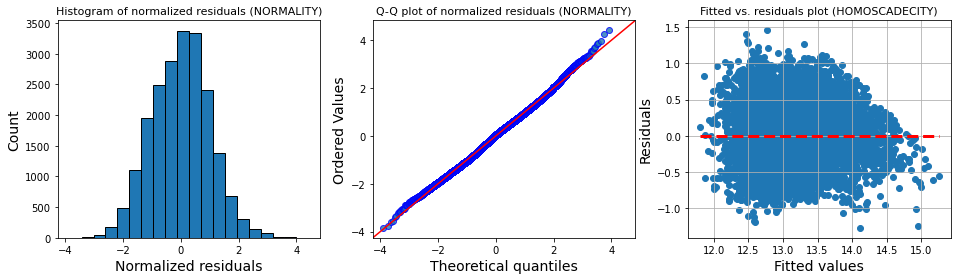

In [131]:
normality_homoscadecity(model);

In [132]:
multicollinearity(X)

,0
const,128.3504
sqft_living,4.2572
bathrooms,2.8699
grade,2.7510
floors,1.7974
bedrooms,1.7152
has_basement,1.2957
has_view,1.1752
sqft_lot,1.1586
condition,1.0991


- We increased R2 to 0.584 while still keeping normality and homoscadecity intact. 
- All variables are statistically significant.

### MODEL #6
- Adding the month the house was sold (January is reference) to the model. 

In [133]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'august', 'december', 'february', 'july', 'june', 'march',
               'may', 'november', 'october', 'september'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1409.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:30   Log-Likelihood:                -6446.0
No. Observations:               20904   AIC:                         1.294e+04
Df Residuals:                   20882   BIC:                         1.311e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.7851      0.028    389.308      0.000      10.731      10.839
sqft_living      0.0002   5.41e-06     38.221      0.000       0.000       0.000
sqft_lot     -1.469e-06   1.98e-07     -7.424      0.000   -1.86e-06   -1.08e-06
condition        0.0964      0.004     26.187      0.000       0.089       0.104
grade            0.1908      0.003     57.690      0.000       0.184       0.197
has_view         0.1817      0.008     21.502      0.000       0.165       0.198
waterfront       0.4284      0.031     13.714      0.000       0.367       0.490
bedrooms        -0.0204      0.003     -6.085      0.000      -0.027      -0.014
bathrooms       -0.0277      0.005     -5.363      0.000      -0.038      -0.018
has_basement     0.1155      0.005     21.662      0.000       0.105       0.126
floors           0.0639      0.006     11.294      0.000       0.053       0.075
april            0.0813      0.013      6.341      0.000       0.056       0.106
august           0.0143      0.013      1.088      0.277      -0.011       0.040
december        -0.0041      0.014     -0.293      0.769      -0.031       0.023
february         0.0049      0.014      0.342      0.733      -0.023       0.033
july             0.0178      0.013      1.380      0.168      -0.007       0.043
june             0.0272      0.013      2.104      0.035       0.002       0.052
march            0.0571      0.013      4.324      0.000       0.031       0.083
may              0.0390      0.013      3.067      0.002       0.014       0.064
november         0.0033      0.014      0.236      0.813      -0.024       0.031
october          0.0191      0.013      1.442      0.149      -0.007       0.045
september        0.0160      0.013      1.200      0.230      -0.010       0.042
==============================================================================
Omnibus:                        9.523   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.509
Skew:                           0.052   Prob(JB):                      0.00861
Kurtosis:                       3.015   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

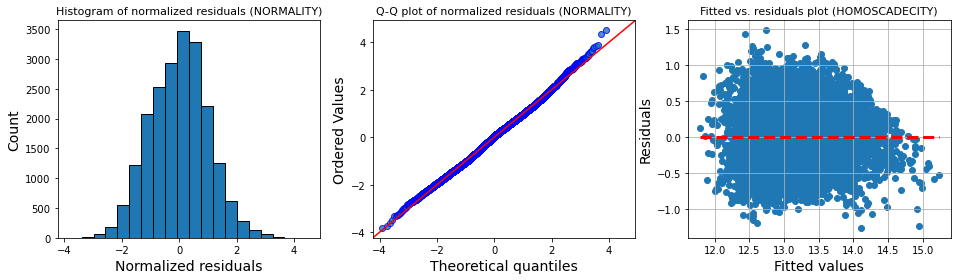

In [134]:
normality_homoscadecity(model);

In [135]:
multicollinearity(X)

,0
const,147.7278
sqft_living,4.2592
may,3.0693
april,2.9614
july,2.9319
june,2.9041
bathrooms,2.8723
grade,2.7531
august,2.7078
march,2.6760


- R2 increased very slightly from 0.584 to .586 - normality and homoscadecity are intact, and multicollinearity is absent. 
- It seems like it is the months of spring that have an impact on price. But there are also a lot of non-signifcant months. Let's remove the nonsignificant months from the model to increase its performance (non-signifcance means that there is insufficient evidence in your sample to conclude that a correlation exists). 

#### Removing nonsignificant months:

In [136]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2157.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:31   Log-Likelihood:                -6322.2
No. Observations:               20904   AIC:                         1.267e+04
Df Residuals:                   20889   BIC:                         1.279e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3883      0.043    264.906      0.000      11.304      11.473
sqft_living      0.0002   5.66e-06     41.670      0.000       0.000       0.000
log_sqft_lot    -0.0665      0.004    -17.676      0.000      -0.074      -0.059
condition        0.0979      0.004     26.765      0.000       0.091       0.105
grade            0.1904      0.003     57.923      0.000       0.184       0.197
has_view         0.1827      0.008     21.762      0.000       0.166       0.199
waterfront       0.4553      0.031     14.648      0.000       0.394       0.516
bedrooms        -0.0171      0.003     -5.148      0.000      -0.024      -0.011
bathrooms       -0.0331      0.005     -6.432      0.000      -0.043      -0.023
has_basement     0.0890      0.006     16.043      0.000       0.078       0.100
floors           0.0194      0.006      3.097      0.002       0.007       0.032
april            0.0703      0.008      9.248      0.000       0.055       0.085
march            0.0462      0.008      5.626      0.000       0.030       0.062
may              0.0269      0.007      3.633      0.000       0.012       0.041
june             0.0181      0.008      2.349      0.019       0.003       0.033
==============================================================================
Omnibus:                        9.095   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.121
Skew:                           0.045   Prob(JB):                       0.0105
Kurtosis:                       3.049   Cond. No.                     4.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

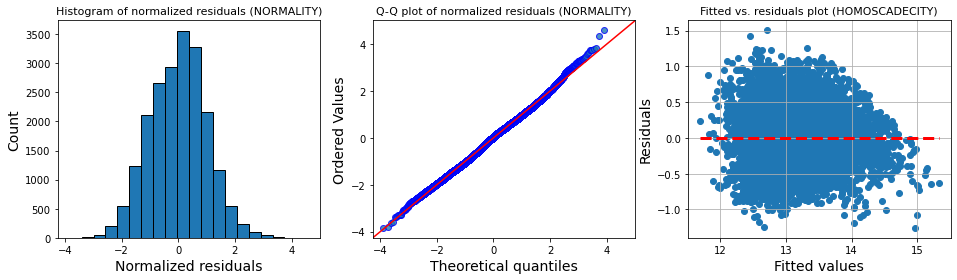

In [137]:
normality_homoscadecity(model);

In [138]:
multicollinearity(X)

,0
const,360.1094
sqft_living,4.7209
bathrooms,2.8832
grade,2.7509
floors,2.2386
bedrooms,1.7102
log_sqft_lot,1.6723
has_basement,1.4218
has_view,1.1746
condition,1.1024


- R2 increased from 0.584 to 0.591 with the addition of month variable. 
- Normality and homoscadecity intact. 
- All variables are statistically significant.

### MODEL #7
- adding `age<30`

In [139]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2104.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:32   Log-Likelihood:                -6045.4
No. Observations:               20904   AIC:                         1.212e+04
Df Residuals:                   20888   BIC:                         1.225e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4741      0.043    269.472      0.000      11.391      11.558
sqft_living      0.0002   5.59e-06     42.195      0.000       0.000       0.000
log_sqft_lot    -0.0762      0.004    -20.405      0.000      -0.083      -0.069
condition        0.0684      0.004     17.914      0.000       0.061       0.076
grade            0.1988      0.003     60.928      0.000       0.192       0.205
has_view         0.1629      0.008     19.556      0.000       0.147       0.179
waterfront       0.4487      0.031     14.626      0.000       0.389       0.509
bedrooms        -0.0285      0.003     -8.570      0.000      -0.035      -0.022
bathrooms        0.0065      0.005      1.223      0.221      -0.004       0.017
has_basement     0.0657      0.006     11.809      0.000       0.055       0.077
floors           0.0656      0.006     10.114      0.000       0.053       0.078
april            0.0696      0.008      9.272      0.000       0.055       0.084
march            0.0456      0.008      5.627      0.000       0.030       0.061
may              0.0302      0.007      4.132      0.000       0.016       0.045
june             0.0178      0.008      2.339      0.019       0.003       0.033
age<30          -0.1664      0.007    -23.677      0.000      -0.180      -0.153
==============================================================================
Omnibus:                       17.606   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.068
Skew:                          -0.003   Prob(JB):                     4.39e-05
Kurtosis:                       3.152   Cond. No.                     4.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove `bathrooms` as it is not significant any more:
- It also correlates highly with `sqft_living`.

In [140]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2254.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:32   Log-Likelihood:                -6046.1
No. Observations:               20904   AIC:                         1.212e+04
Df Residuals:                   20889   BIC:                         1.224e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4737      0.043    269.467      0.000      11.390      11.557
sqft_living      0.0002   5.26e-06     45.307      0.000       0.000       0.000
log_sqft_lot    -0.0763      0.004    -20.467      0.000      -0.084      -0.069
condition        0.0687      0.004     18.039      0.000       0.061       0.076
grade            0.1992      0.003     61.375      0.000       0.193       0.206
has_view         0.1630      0.008     19.567      0.000       0.147       0.179
waterfront       0.4489      0.031     14.632      0.000       0.389       0.509
bedrooms        -0.0275      0.003     -8.516      0.000      -0.034      -0.021
has_basement     0.0670      0.005     12.278      0.000       0.056       0.078
floors           0.0670      0.006     10.472      0.000       0.054       0.080
april            0.0696      0.008      9.270      0.000       0.055       0.084
march            0.0455      0.008      5.619      0.000       0.030       0.061
may              0.0301      0.007      4.122      0.000       0.016       0.044
june             0.0179      0.008      2.353      0.019       0.003       0.033
age<30          -0.1638      0.007    -24.527      0.000      -0.177      -0.151
==============================================================================
Omnibus:                       17.640   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.104
Skew:                          -0.004   Prob(JB):                     4.31e-05
Kurtosis:                       3.152   Cond. No.                     4.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

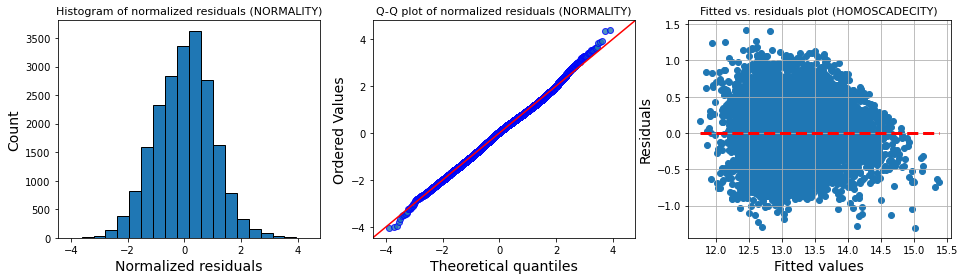

In [141]:
normality_homoscadecity(model);

In [142]:
multicollinearity(X)

,0
const,362.7151
sqft_living,4.1756
grade,2.7550
floors,2.3907
age<30,2.1350
log_sqft_lot,1.6902
bedrooms,1.6554
has_basement,1.4128
condition,1.2280
has_view,1.1866


- R2 increased from .591 to .602 with the addition of `age` variable. 
- Normality and homoscadecity intact. 

### FINAL MODEL #8
- adding location variables

In [143]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view' ,'waterfront', 
             'bedrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3531.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:33   Log-Likelihood:                -1066.0
No. Observations:               20904   AIC:                             2170.
Df Residuals:                   20885   BIC:                             2321.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6461      0.020    527.661      0.000      10.607      10.686
sqft_living      0.0002   3.98e-06     54.679      0.000       0.000       0.000
sqft_lot      1.462e-06   1.58e-07      9.252      0.000    1.15e-06    1.77e-06
condition        0.0834      0.003     27.687      0.000       0.077       0.089
grade            0.1608      0.003     62.077      0.000       0.156       0.166
has_view         0.1427      0.007     21.628      0.000       0.130       0.156
waterfront       0.5171      0.024     21.397      0.000       0.470       0.564
bedrooms        -0.0030      0.003     -1.155      0.248      -0.008       0.002
has_basement     0.0173      0.004      4.032      0.000       0.009       0.026
floors           0.0303      0.005      6.315      0.000       0.021       0.040
april            0.0677      0.006     11.452      0.000       0.056       0.079
march            0.0561      0.006      8.786      0.000       0.044       0.069
may              0.0169      0.006      2.939      0.003       0.006       0.028
june             0.0090      0.006      1.494      0.135      -0.003       0.021
age<30          -0.0246      0.005     -4.533      0.000      -0.035      -0.014
east             0.4867      0.005     90.505      0.000       0.476       0.497
fareast          0.4006      0.006     62.555      0.000       0.388       0.413
north            0.3322      0.008     40.583      0.000       0.316       0.348
west             0.5308      0.005    104.297      0.000       0.521       0.541
==============================================================================
Omnibus:                      581.185   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1409.328
Skew:                          -0.090   Prob(JB):                    9.30e-307
Kurtosis:                       4.259   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove `bedrooms` and `june` from the model:

In [144]:
variables = variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view' ,'waterfront', 
             'has_basement', 'floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3972.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:33   Log-Likelihood:                -1067.8
No. Observations:               20904   AIC:                             2170.
Df Residuals:                   20887   BIC:                             2305.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6384      0.019    563.259      0.000      10.601      10.675
sqft_living      0.0002   3.43e-06     62.667      0.000       0.000       0.000
sqft_lot       1.48e-06   1.57e-07      9.407      0.000    1.17e-06    1.79e-06
condition        0.0834      0.003     27.712      0.000       0.078       0.089
grade            0.1612      0.003     62.788      0.000       0.156       0.166
has_view         0.1433      0.007     21.805      0.000       0.130       0.156
waterfront       0.5184      0.024     21.474      0.000       0.471       0.566
has_basement     0.0171      0.004      4.005      0.000       0.009       0.026
floors           0.0300      0.005      6.257      0.000       0.021       0.039
april            0.0664      0.006     11.346      0.000       0.055       0.078
march            0.0547      0.006      8.651      0.000       0.042       0.067
may              0.0156      0.006      2.742      0.006       0.004       0.027
age<30          -0.0240      0.005     -4.440      0.000      -0.035      -0.013
east             0.4868      0.005     90.527      0.000       0.476       0.497
fareast          0.4012      0.006     62.808      0.000       0.389       0.414
north            0.3324      0.008     40.612      0.000       0.316       0.348
west             0.5316      0.005    105.152      0.000       0.522       0.541
==============================================================================
Omnibus:                      579.603   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.417
Skew:                          -0.088   Prob(JB):                    3.99e-306
Kurtosis:                       4.258   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

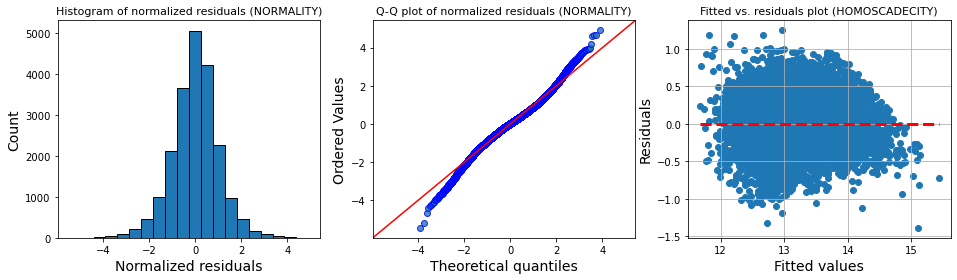

In [145]:
normality_homoscadecity(model);

In [146]:
multicollinearity(X)

,0
const,114.8988
sqft_living,2.8630
grade,2.7764
age<30,2.2580
floors,2.1560
west,1.8748
east,1.5564
has_basement,1.3967
fareast,1.3886
condition,1.2346


- R2 increased from .602 to .753 with the addition of locations! 
- Homoscadecity is still intact. 
- Normality is worse with the addition of this variable but it is still acceptable. 
- No multicollinearity.

#### Model with log-transformed independent variables to see if the normality will be improved:

In [147]:
variables = variables = ['log_sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'has_basement', 'floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4044.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:34   Log-Likelihood:                -927.26
No. Observations:               20904   AIC:                             1889.
Df Residuals:                   20887   BIC:                             2024.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4255      0.044    170.017      0.000       7.340       7.511
log_sqft_living     0.4525      0.007     60.360      0.000       0.438       0.467
log_sqft_lot        0.0276      0.003      8.706      0.000       0.021       0.034
condition           0.0796      0.003     26.573      0.000       0.074       0.086
grade               0.1650      0.002     66.444      0.000       0.160       0.170
has_view            0.1568      0.007     24.087      0.000       0.144       0.170
waterfront          0.5308      0.024     22.115      0.000       0.484       0.578
has_basement       -0.0048      0.005     -1.051      0.293      -0.014       0.004
floors              0.0209      0.005      4.096      0.000       0.011       0.031
april               0.0656      0.006     11.284      0.000       0.054       0.077
march               0.0547      0.006      8.698      0.000       0.042       0.067
may                 0.0175      0.006      3.099      0.002       0.006       0.029
age<30             -0.0201      0.005     -3.663      0.000      -0.031      -0.009
east                0.4955      0.005     92.825      0.000       0.485       0.506
fareast             0.4097      0.006     64.674      0.000       0.397       0.422
north               0.3339      0.008     41.081      0.000       0.318       0.350
west                0.5638      0.005    105.623      0.000       0.553       0.574
==============================================================================
Omnibus:                      564.380   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1424.854
Skew:                           0.003   Prob(JB):                    3.95e-310
Kurtosis:                       4.279   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
variables = variables = ['log_sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4313.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:34   Log-Likelihood:                -927.82
No. Observations:               20904   AIC:                             1888.
Df Residuals:                   20888   BIC:                             2015.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4384      0.042    177.491      0.000       7.356       7.521
log_sqft_living     0.4489      0.007     67.003      0.000       0.436       0.462
log_sqft_lot        0.0285      0.003      9.297      0.000       0.022       0.034
condition           0.0796      0.003     26.573      0.000       0.074       0.086
grade               0.1652      0.002     66.689      0.000       0.160       0.170
has_view            0.1562      0.006     24.089      0.000       0.143       0.169
waterfront          0.5304      0.024     22.099      0.000       0.483       0.577
floors              0.0230      0.005      4.859      0.000       0.014       0.032
april               0.0656      0.006     11.284      0.000       0.054       0.077
march               0.0547      0.006      8.700      0.000       0.042       0.067
may                 0.0175      0.006      3.096      0.002       0.006       0.029
age<30             -0.0197      0.005     -3.602      0.000      -0.030      -0.009
east                0.4955      0.005     92.819      0.000       0.485       0.506
fareast             0.4100      0.006     64.788      0.000       0.398       0.422
north               0.3335      0.008     41.080      0.000       0.318       0.349
west                0.5627      0.005    107.414      0.000       0.552       0.573
==============================================================================
Omnibus:                      564.179   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.955
Skew:                           0.005   Prob(JB):                    6.20e-310
Kurtosis:                       4.279   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

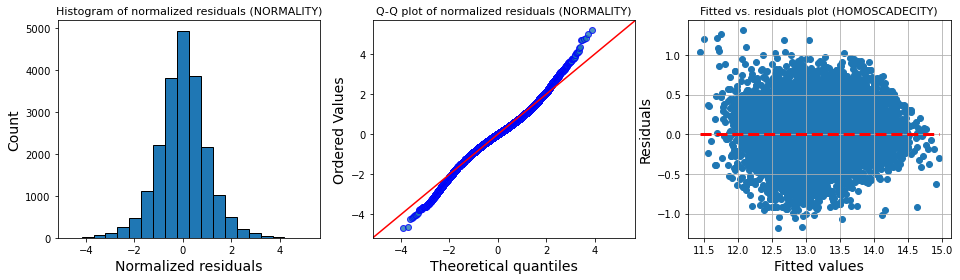

In [149]:
normality_homoscadecity(model);

- Slight imporovement in R2 but slight worsening in Kurtosis and Jarque-Bera (JB). 
- For ease of interpretation let's keep the previous model. 

In [150]:
variables =  ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view' ,'waterfront', 
             'has_basement', 'floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3972.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:34   Log-Likelihood:                -1067.8
No. Observations:               20904   AIC:                             2170.
Df Residuals:                   20887   BIC:                             2305.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6384      0.019    563.259      0.000      10.601      10.675
sqft_living      0.0002   3.43e-06     62.667      0.000       0.000       0.000
sqft_lot       1.48e-06   1.57e-07      9.407      0.000    1.17e-06    1.79e-06
condition        0.0834      0.003     27.712      0.000       0.078       0.089
grade            0.1612      0.003     62.788      0.000       0.156       0.166
has_view         0.1433      0.007     21.805      0.000       0.130       0.156
waterfront       0.5184      0.024     21.474      0.000       0.471       0.566
has_basement     0.0171      0.004      4.005      0.000       0.009       0.026
floors           0.0300      0.005      6.257      0.000       0.021       0.039
april            0.0664      0.006     11.346      0.000       0.055       0.078
march            0.0547      0.006      8.651      0.000       0.042       0.067
may              0.0156      0.006      2.742      0.006       0.004       0.027
age<30          -0.0240      0.005     -4.440      0.000      -0.035      -0.013
east             0.4868      0.005     90.527      0.000       0.476       0.497
fareast          0.4012      0.006     62.808      0.000       0.389       0.414
north            0.3324      0.008     40.612      0.000       0.316       0.348
west             0.5316      0.005    105.152      0.000       0.522       0.541
==============================================================================
Omnibus:                      579.603   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.417
Skew:                          -0.088   Prob(JB):                    3.99e-306
Kurtosis:                       4.258   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Coefficient interpreration:

In [151]:
coefs = model.params.apply('{0:.6f}'.format)
coefs = pd.DataFrame(coefs).reset_index()
coefs = coefs.rename({'index':'var', 0:'coef'}, axis =1)
coefs.coef = pd.to_numeric(coefs.coef)
coefs

,var,coef
0,const,10.638372
1,sqft_living,0.000215
2,sqft_lot,0.000001
3,condition,0.083434
4,grade,0.161232
5,has_view,0.143341
6,waterfront,0.518445
7,has_basement,0.017130
8,floors,0.029957
9,april,0.066388


In [152]:
# Because the target variable is log-transformed:
coefs['exp_coef'] = ((np.exp(coefs.coef) - 1) * 100).apply('{0:.6f}'.format)
coefs

,var,coef,exp_coef
0,const,10.638372,4170382.047389
1,sqft_living,0.000215,0.021502
2,sqft_lot,0.000001,0.000100
3,condition,0.083434,8.701347
4,grade,0.161232,17.495753
5,has_view,0.143341,15.412329
6,waterfront,0.518445,67.941413
7,has_basement,0.017130,1.727756
8,floors,0.029957,3.041023
9,april,0.066388,6.864127


#### Model summary:
    

- R-squared of 0.753 means that the dependent variables explain 75% of the variability in price. 
- All variables are statistically significnant (p <.05) meaning we have enough evidence to say that they are related to price. 
- Normality is acceptaple, homoscadecity is intact, no presence of multicollinearity, 
- Durbin-Watson score is between 1.5 and 2.5, meaning: no first-order autocorrelation.
- Skewness is between -0.5 and 0.5, it is approximately symmetric.
- Kurtosis is 4.2 which is not ideal but acceptable. An increased kurtosis (>3) can be visualized as a thinner “bell” with a higher peak. Hair et al. (2010) and Bryne (2010) argues that data is considered normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

#### Coefficient interpretation:
- For every 1 unit increase in `sqft_living` price increases by about 0.022 %
- For every 100 sqft increase in the house price increases by about 2.2 %. 
- Average sqft of a house is 2000. Given all other variables are kept constant, if you increase a house size from 2000 to 3000 sqft you would increase price by 22%.
***
- For every 1 unit increase in `sqft_lot` price increases by 0.0001 %.
- For every 10000 sqft increase in the lot, price increases by about 1 %. 
***
- For every 1 unit increase in `grade` price increases by 17 %.
***
- Being `waterfront` (1) increases price by 68% compared to being non waterfront (given all other factors are same).
***
- For every `floor` added, price incrases by 3%. 
***
- Houses sold in `April` are 6.8% more expensive than those sold in winter-fall or summer. 
- Houses sold in `March` are 5.6% more expensive than those sold in winter-fall or summer.
- Houses sold in `May` are 1.5% more expensive than those sold in winter-fall or summer.
***
- Houses in `West-Seattle` are 70% more expensive than those in South (given all other factors are the same). 
- Houses in `East` area are 62% more expensive than those in South.

### Recommendations based on regression results: 

1. Invest on increasing the total square footage of the house as much as possible (rather than trying to increase the lot). House size increase from 2000 to 3000 sqft results in 22% increase in price.
2. Being on waterfront increases the house price by 67%, so invest on houses on waterfront. 
3. Put the house on the market in April which increases the price by 6.8%. The next best month is March with a 5.6% increase. 
4. Invest on houses in Seattle area to see 70% increase, and Medina, Bellevue, Mercer Island and Kirkland for a 62% increase compared to the South.